In [1]:
import pandas as pd
import pickle

import sklearn
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='white', context='notebook', palette='viridis', rc={'axes.labelcolor': 'white', 'text.color': 'white', 'xtick.color': 'white','ytick.color': 'white'})
%matplotlib inline

In [72]:
df = pd.read_pickle('/content/second_factor.pkl')

In [73]:
df.describe(include='all')

,id,расстояние минут до почты,расстояние минут до магазина,расстояние минут до банка,"помощь, семья","помощь, прочее",потеря работы,выход на пенсию,банкротство,грабеж,развод,конфликт в семье,болезнь,насилие,смерть чл.семьи,иной стресс,новая работа,стресс на работе,стресс дома,стресс из-за финанс.,депрессия,расстояние минут до почты.1,расстояние минут до магазина.1,расстояние минут до банка.1,диабет: отец,диабет: мать,диабет: братья / сестры,ибс: отец,ибс: мать,ибс: братья / сестры,аг: отец,аг: мать,аг: братья / сестры,инсульт: отец,инсульт: мать,инсульт: братья / сестры,тип жилья,электр-во,мопед,автомобиль,велосипед,пк,телевизор,телефон,ежемес доход,деньги на пищу,дача,квартира,холодная дача,теплая дача
count,1598,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.0,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000
unique,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,54-002-028-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.692741,12.628285,13.525657,0.884230,0.361702,0.102628,0.061327,0.027534,0.013767,0.008135,0.065707,0.116395,0.003129,0.208385,0.125156,0.061952,0.361702,0.501252,1.0,0.292866,7.692741,12.628285,13.525657,0.135169,0.200876,0.098874,0.326033,0.328536,0.155820,0.411765,0.633292,0.361076,0.155820,0.108886,0.411765,0.257822,0.790363,0.067584,0.430538,0.321652,0.619524,0.776596,0.757822,29530.106383,12108.510638,0.527534,0.695244,0.165207,0.118899
std,NaN,6.498887,14.574517,9.004363,0.320049,0.480644,0.303568,0.240004,0.163686,0.116560,0.089856,0.247847,0.320799,0.055867,0.406281,0.331000,0.241145,0.480644,0.500155,0.0,0.455220,6.498887,14.574517,9.004363,0.342011,0.400781,0.298586,0.468906,0.469828,0.362798,0.492307,0.482057,0.480463,0.362798,0.311594,0.492307,0.437573,0.407177,0.251110,0.495307,0.467257,0.485656,0.416657,0.428535,26886.900900,10081.771627,0.499398,0.460448,0.371483,0.323771
min,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,5.000000,7.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,5.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11000.000000,5000.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,5.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,5.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [74]:
df.columns

Index(['id', 'расстояние минут до почты', 'расстояние минут до магазина',
       'расстояние минут до банка', 'помощь, семья', 'помощь, прочее ',
       'потеря работы', 'выход на пенсию', 'банкротство', 'грабеж', 'развод',
       'конфликт в семье', 'болезнь', 'насилие', 'смерть чл.семьи',
       'иной стресс', 'новая работа', 'стресс на работе', 'стресс дома',
       'стресс из-за финанс.', 'депрессия', 'расстояние минут до почты.1',
       'расстояние минут до магазина.1', 'расстояние минут до банка.1',
       'диабет: отец', 'диабет: мать', 'диабет: братья / сестры', 'ибс: отец',
       'ибс: мать', 'ибс: братья / сестры', 'аг: отец', 'аг: мать',
       'аг: братья / сестры', 'инсульт: отец', 'инсульт: мать',
       'инсульт: братья / сестры', 'тип жилья', 'электр-во', 'мопед',
       'автомобиль', 'велосипед', 'пк', 'телевизор', 'телефон', 'ежемес доход',
       'деньги на пищу', 'дача', 'квартира', 'холодная дача', 'теплая дача'],
      dtype='object')

In [78]:
df.columns = ['ID', 'расстояние минут до почты', 'расстояние минут до магазина',
       'расстояние минут до банка', 'помощь, семья', 'помощь, прочее ',
       'потеря работы', 'выход на пенсию', 'банкротство', 'грабеж', 'развод',
       'конфликт в семье', 'болезнь', 'насилие', 'смерть чл.семьи',
       'иной стресс', 'новая работа', 'стресс на работе', 'стресс дома',
       'стресс из-за финанс.', 'депрессия', 'расстояние минут до почты.1',
       'расстояние минут до магазина.1', 'расстояние минут до банка.1',
       'диабет: отец', 'диабет: мать', 'диабет: братья / сестры', 'ибс: отец',
       'ибс: мать', 'ибс: братья / сестры', 'аг: отец', 'аг: мать',
       'аг: братья / сестры', 'инсульт: отец', 'инсульт: мать',
       'инсульт: братья / сестры', 'тип жилья', 'электр-во', 'мопед',
       'автомобиль', 'велосипед', 'пк', 'телевизор', 'телефон', 'ежемес доход',
       'деньги на пищу', 'дача', 'квартира', 'холодная дача', 'теплая дача']

In [71]:
df1 = pd.read_excel('/content/base.xlsx', sheet_name='Оценка терр')
df2 = pd.read_excel('/content/base.xlsx', sheet_name='Физич акт')

In [76]:
df1 = df1[['ID', 'близость остановки',
     'время до работы',
     'близость магазинов',
     'близость к друзьям',
     'окружающий вид',
     'культурные объекты',
     'уровень преступности',
     'транспортная нагрузка',
     'подходит для детей',
     'общая удовлитворенность средой']]
df2 = df2[['ID',
     'сидение/неделю, минут',
     'Хотьба-отдых/недел, минуты',
     'Хотьба-транспорт/недел, минуты',
     'Хотьба-работа/недел, минуты',
     'Итого хотьба',
     'менее часа, от 1-2, от 2-4, более 4']]

In [79]:
fulldf = df.merge(df1).merge(df2)

In [80]:
fulldf.describe(include='all')

,ID,расстояние минут до почты,расстояние минут до магазина,расстояние минут до банка,"помощь, семья","помощь, прочее",потеря работы,выход на пенсию,банкротство,грабеж,развод,конфликт в семье,болезнь,насилие,смерть чл.семьи,иной стресс,новая работа,стресс на работе,стресс дома,стресс из-за финанс.,депрессия,расстояние минут до почты.1,расстояние минут до магазина.1,расстояние минут до банка.1,диабет: отец,диабет: мать,диабет: братья / сестры,ибс: отец,ибс: мать,ибс: братья / сестры,аг: отец,аг: мать,аг: братья / сестры,инсульт: отец,инсульт: мать,инсульт: братья / сестры,тип жилья,электр-во,мопед,автомобиль,велосипед,пк,телевизор,телефон,ежемес доход,деньги на пищу,дача,квартира,холодная дача,теплая дача,близость остановки,время до работы,близость магазинов,близость к друзьям,окружающий вид,культурные объекты,уровень преступности,транспортная нагрузка,подходит для детей,общая удовлитворенность средой,"сидение/неделю, минут","Хотьба-отдых/недел, минуты","Хотьба-транспорт/недел, минуты","Хотьба-работа/недел, минуты",Итого хотьба,"менее часа, от 1-2, от 2-4, более 4"
count,1598,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.0,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1263.000000,1262.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000
unique,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,54-002-028-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.692741,12.628285,13.525657,0.884230,0.361702,0.102628,0.061327,0.027534,0.013767,0.008135,0.065707,0.116395,0.003129,0.208385,0.125156,0.061952,0.361702,0.501252,1.0,0.292866,7.692741,12.628285,13.525657,0.135169,0.200876,0.098874,0.326033,0.328536,0.155820,0.411765,0.633292,0.361076,0.155820,0.108886,0.411765,0.257822,0.790363,0.067584,0.430538,0.321652,0.619524,0.776596,0.757822,29530.106383,12108.510638,0.527534,0.695244,0.165207,0.118899,4.417260,4.032488,4.533650,4.555028,4.270784,3.311956,4.064133,3.585115,3.802850,4.129058,1996.851690,182.478723,292.333542,368.133917,842.946183,2.081352
std,NaN,6.498887,14.574517,9.004363,0.320049,0.480644,0.303568,0.240004,0.163686,0.116560,0.089856,0.247847,0.320799,0.055867,0.406281,0.331000,0.241145,0.480644,0.500155,0.0,0.455220,6.498887,14.574517,9.004363,0.342011,0.400781,0.298586,0.468906,0.469828,0.362798,0.492307,0.482057,0.480463,0.362798,0.311594,0.492307,0.437573,0.407177,0.251110,0.495307,0.467257,0.485656,0.416657,0.428535,26886.900900,10081.771627,0.499398,0.460448,0.371483,0.323771,1.097867,1.185315,0.989773,0.896341,1.100134,1.559463,1.180200,1.465558,1.416428,1.193605,1572.871825,311.407336,401.221377,696.710681,899.517423,1.092877
min,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [81]:
numerical = ['расстояние минут до почты', 
             'расстояние минут до магазина',
             'расстояние минут до банка',
             'расстояние минут до почты.1',
             'расстояние минут до магазина.1',
             'расстояние минут до банка.1',
             'ежемес доход',
             'деньги на пищу',
             'близость остановки',
             'время до работы',
     'близость магазинов',
     'близость к друзьям',
     'окружающий вид',
     'культурные объекты',
     'уровень преступности',
     'транспортная нагрузка',
     'подходит для детей',
     'общая удовлитворенность средой','сидение/неделю, минут',
     'Хотьба-отдых/недел, минуты',
     'Хотьба-транспорт/недел, минуты',
     'Хотьба-работа/недел, минуты',
     'Итого хотьба',
     'менее часа, от 1-2, от 2-4, более 4'
              ]
binary = ['помощь, семья',
          'помощь, прочее',
          'потеря работы',
          'выход на пенсию', 
          'банкротство', 
          'грабеж', 
          'развод',
       'конфликт в семье', 
       'болезнь', 
       'насилие', 
       'смерть чл.семьи',
       'иной стресс', 
       'новая работа', 
       'стресс на работе', 
       'стресс дома',
       'стресс из-за финанс.', 
       'депрессия',
       'диабет: отец', 
       'диабет: мать', 
       'диабет: братья / сестры', 
       'ибс: отец',
       'ибс: мать', 
       'ибс: братья / сестры', 
       'аг: отец', 
       'аг: мать',
       'аг: братья / сестры', 
       'инсульт: отец', 
       'инсульт: мать',
       'инсульт: братья / сестры', 
       'тип жилья', 
       'электр-во', 
       'мопед',
       'автомобиль', 
       'велосипед', 
       'пк', 'телевизор', 
       'телефон',
       'дача', 
       'квартира', 
       'холодная дача', 
       'теплая дача'
          ]

In [82]:
Y = pd.read_pickle('/content/db_4.pkl')

In [83]:
Y.columns = ['ID', 'class']

In [84]:
y = [x[1] for x in Y.values]

In [85]:
fulldf.to_pickle('fulldf.pkl')

In [77]:
df = pd.read_pickle('/content/fulldf.pkl')

In [86]:
m_df = df.merge(Y)

In [87]:
m_df = m_df.fillna(m_df.mode().iloc[0])

In [88]:
Y = m_df['class'].values

In [89]:
df = m_df.drop(labels=['ID', 'class'], axis=1)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score

import xgboost as xgb
import lightgbm as lgb

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=42)

In [92]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    score = cross_val_score(model, X_train.values, y_train, scoring="accuracy", cv = kf)
    return(score)

In [105]:
logreg = make_pipeline(RobustScaler(), LogisticRegression(max_iter=1000))

In [106]:
GBoost = GradientBoostingClassifier(n_estimators=5000)

In [107]:
model_xgb = xgb.XGBClassifier(n_estimators=5000)

In [108]:
model_lgb = lgb.LGBMClassifier(n_estimators=5000)

In [123]:
def scores(model, name):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    print(name)
    ascore = cross_val_score(model, X_train.values, y_train, scoring="accuracy", cv = kf)
    print("ascore: {:.4f} ({:.4f})\n".format(ascore.mean(), ascore.std()))
    pscore = cross_val_score(model, X_train.values, y_train, scoring="precision", cv = kf)
    print("pscore: {:.4f} ({:.4f})\n".format(pscore.mean(), pscore.std()))
    rscore = cross_val_score(model, X_train.values, y_train, scoring="recall", cv = kf)
    print("rscore: {:.4f} ({:.4f})\n".format(rscore.mean(), rscore.std()))    


In [124]:
scores(logreg, 'logreg')
scores(GBoost, 'GBoost')
scores(model_xgb, 'model_xgb')
scores(model_lgb, 'model_lgb')

linreg
ascore: 0.6033 (0.0286)

pscore: 0.6227 (0.0228)

rscore: 0.6441 (0.0407)

GBoost
ascore: 0.5594 (0.0206)

pscore: 0.5903 (0.0222)

rscore: 0.5941 (0.0143)

model_xgb
ascore: 0.5665 (0.0171)

pscore: 0.5906 (0.0183)

rscore: 0.6088 (0.0284)

model_xgb
ascore: 0.5900 (0.0154)

pscore: 0.6098 (0.0184)

rscore: 0.6412 (0.0248)



In [109]:
RFC = RandomForestClassifier(n_estimators=3000)

In [126]:
scores(RFC, 'forest')

forest
ascore: 0.5923 (0.0173)

pscore: 0.6080 (0.0133)

rscore: 0.6735 (0.0178)



In [133]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=5000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [139]:
preds = model_xgb.predict(X_test)

In [140]:
accuracy_score(y_test, preds), precision_score(y_test, preds), recall_score(y_test, preds)

(0.575, 0.6081871345029239, 0.6011560693641619)

In [142]:
sum(y_test)/len(y_test)

0.540625

In [119]:
logreg.fit(X_train, y_train)
preds = logreg.predict(X_test)
accuracy_score(y_test, preds), precision_score(y_test, preds), recall_score(y_test, preds)

(0.63125, 0.6470588235294118, 0.6994219653179191)

In [167]:
def get_xgb_imp(xgb, feat_names):
    from numpy import array
    imp_vals = xgb.get_booster().get_fscore()
    
    imp_dict = {feat_names[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(feat_names))}
    print(imp_vals)
    total = array(list(imp_vals.values())).sum()
       
    
    return  {k:v/total for k,v in imp_vals.items()}

In [152]:
feat_names = X_train.columns

In [220]:
importsnce = get_xgb_imp(model_xgb, feat_names)

{'аг: братья / сестры': 365, 'ибс: мать': 332, 'аг: отец': 389, 'ежемес доход': 1927, 'стресс на работе': 392, 'потеря работы': 127, 'сидение/неделю, минут': 4578, 'аг: мать': 280, 'Хотьба-работа/недел, минуты': 1180, 'Хотьба-транспорт/недел, минуты': 1953, 'время до работы': 381, 'пк': 294, 'Хотьба-отдых/недел, минуты': 1891, 'транспортная нагрузка': 526, 'велосипед': 229, 'расстояние минут до банка': 1116, 'холодная дача': 170, 'инсульт: мать': 212, 'Итого хотьба': 2756, 'новая работа': 124, 'смерть чл.семьи': 294, 'помощь, семья': 48, 'общая удовлитворенность средой': 314, 'банкротство': 50, 'депрессия': 273, 'близость к друзьям': 181, 'расстояние минут до почты': 1035, 'выход на пенсию': 114, 'болезнь': 143, 'тип жилья': 107, 'расстояние минут до магазина': 1023, 'деньги на пищу': 838, 'помощь, прочее ': 402, 'квартира': 126, 'культурные объекты': 631, 'подходит для детей': 322, 'стресс дома': 329, 'уровень преступности': 516, 'диабет: братья / сестры': 151, 'ибс: братья / сестры':

In [221]:
importsnce = dict(sorted(importsnce.items(), key=lambda x: x[1]))

In [222]:
imp = pd.Series(importsnce)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


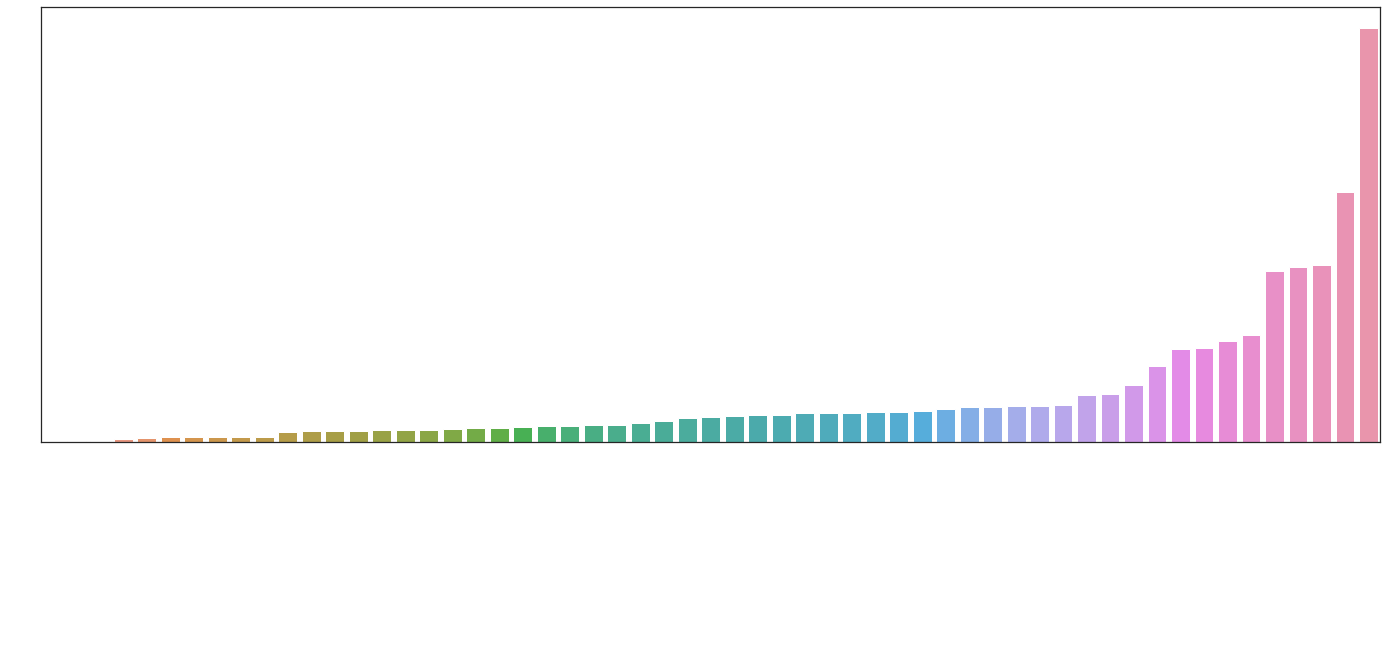

In [223]:
fig, ax = plt.subplots(figsize=(24, 8))
sns.barplot(imp.index, imp.values, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [224]:
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [233]:
importance_RFC = pd.DataFrame({'feature':X_train.columns, 'imp':RFC.feature_importances_})

In [234]:
importance_RFC

,feature,imp
0,расстояние минут до почты,0.028020
1,расстояние минут до магазина,0.029174
2,расстояние минут до банка,0.031411
3,"помощь, семья",0.007358
4,"помощь, прочее",0.012307
...,...,...
60,"Хотьба-отдых/недел, минуты",0.038542
61,"Хотьба-транспорт/недел, минуты",0.048575
62,"Хотьба-работа/недел, минуты",0.037777
63,Итого хотьба,0.057251


In [238]:
preds = RFC.predict(X_test)

In [239]:
accuracy_score(y_test, preds), precision_score(y_test, preds), recall_score(y_test, preds)

(0.621875, 0.6354166666666666, 0.7052023121387283)

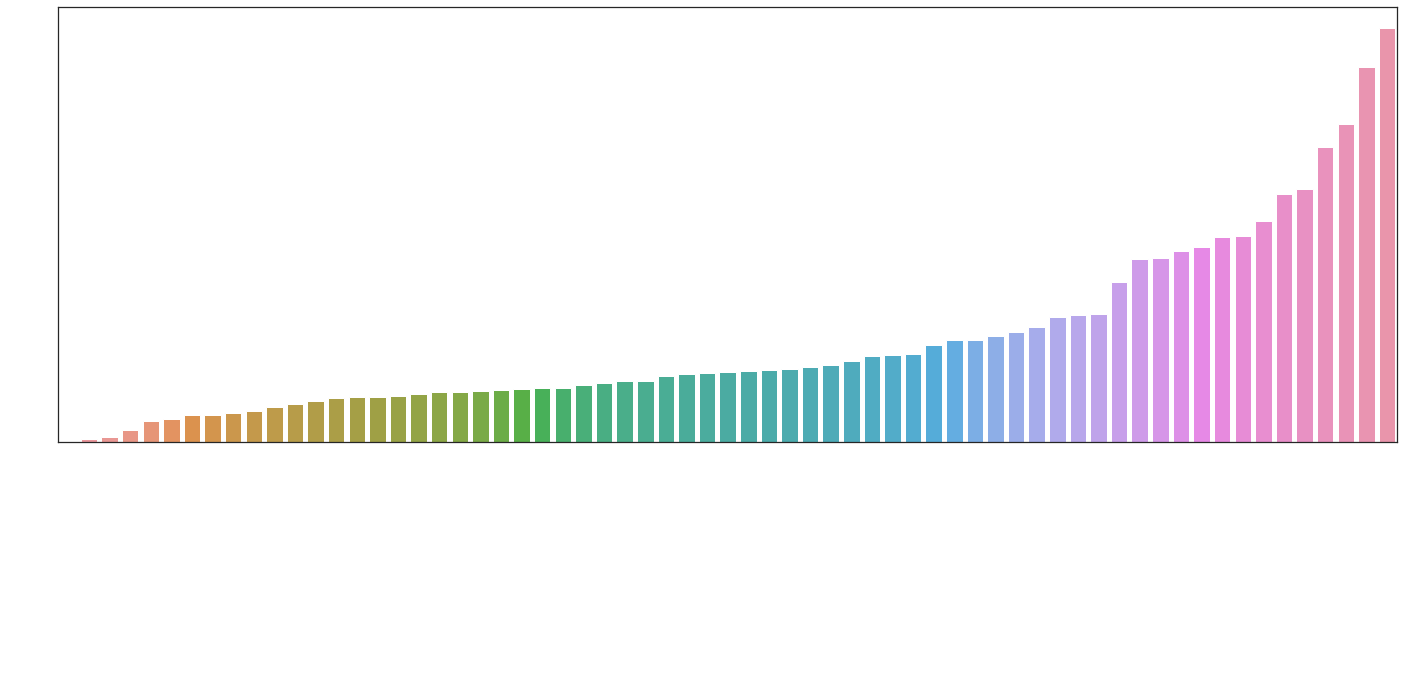

In [241]:
fig, ax = plt.subplots(figsize=(24, 8))
sns.barplot(data=importance_RFC.sort_values(by='imp'), x='feature', y='imp', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [243]:
!pip install treeinterpreter

In [244]:
from treeinterpreter import treeinterpreter as ti

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [281]:
preds = RFC.predict(X_test.iloc[0:20].values)

In [274]:
prediction, bias, contributions = ti.predict(RFC, X_test.iloc[0:20])

In [ ]:
print("Class Prediction", prediction)
print("Bias (trainset prior)", bias)
print()
for c, feature in sorted(zip(contributions[0], X_train.columns), key=lambda x: -abs(x[0][0])):
  print(feature, c[1])

In [292]:
contributions = contributions.astype('float32')

In [ ]:
X_train.columns.to_list()

In [299]:
c = [list(x) for x in contributions]

In [276]:
import json

In [306]:
total = {'features': X_train.columns.to_list(),
         'predictions': preds.tolist(),
         'contributions': contributions.tolist()
         }

In [307]:
with open('contrib.json', 'w') as f:
  json.dump(total, f, indent='  ',)

In [31]:
import tensorflow as tf

In [93]:
input_shape = X_train.shape[1]
input_shape

49

In [112]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(40, activation='relu', input_shape=[input_shape]),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(20, activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.9),
                                    tf.keras.layers.Dense(20, activation='relu'),
                                    tf.keras.layers.Dropout(0.9),
                                    tf.keras.layers.Dense(1, activation='softmax', name='out')
])

In [113]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 40)                2000      
_________________________________________________________________
batch_normalization_12 (Batc (None, 40)                160       
_________________________________________________________________
dropout_16 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 20)                820       
_________________________________________________________________
batch_normalization_13 (Batc (None, 20)                80        
_________________________________________________________________
dropout_17 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 20)               

In [114]:
model.compile(optimizer='SGD', 
              loss='binary_crossentropy', 
              metrics=[
                       tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.Precision()
                       ])

In [115]:
model.fit(x=X_train.to_numpy(), y=np.array(y_train), batch_size=32, epochs=100, steps_per_epoch=X_train.shape[0]//32)

Epoch 1/100
39/39 [==============================] - 0s 2ms/step - loss: 7.1725 - binary_accuracy: 0.5296 - recall_9: 1.0000 - precision_9: 0.5296
Epoch 2/100
39/39 [==============================] - 0s 1ms/step - loss: 7.1106 - binary_accuracy: 0.5337 - recall_9: 1.0000 - precision_9: 0.5337
Epoch 3/100
39/39 [==============================] - 0s 1ms/step - loss: 7.0005 - binary_accuracy: 0.5409 - recall_9: 1.0000 - precision_9: 0.5409
Epoch 4/100
39/39 [==============================] - 0s 1ms/step - loss: 7.2819 - binary_accuracy: 0.5225 - recall_9: 1.0000 - precision_9: 0.5225
Epoch 5/100
39/39 [==============================] - 0s 1ms/step - loss: 7.0984 - binary_accuracy: 0.5345 - recall_9: 1.0000 - precision_9: 0.5345
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: 7.1473 - binary_accuracy: 0.5313 - recall_9: 1.0000 - precision_9: 0.5313
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 7.0005 - binary_accuracy: 0.5409 - recall_9: 

In [104]:
model.save('keras_model.h5')

In [110]:
import joblib

In [111]:
from sklearn.ensemble import StackingClassifier

In [116]:
estimators = [
     ('logreg', logreg),
     ('GBoost', GBoost),
     ('model_xgb', model_xgb),
     ('model_lgb', model_lgb),
     ('RFC', RFC)
]

In [117]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [118]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.60625

In [119]:
joblib.dump(clf, 'ensamble_model.joblib')

['ensamble_model.joblib']

In [121]:
def build_model():
  model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(40, activation='relu', input_shape=[input_shape]),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(20, activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.9),
                                    tf.keras.layers.Dense(20, activation='relu'),
                                    tf.keras.layers.Dropout(0.9),
                                    tf.keras.layers.Dense(1, activation='softmax', name='out')
])
  model.compile(optimizer='SGD', 
              loss='binary_crossentropy', 
              metrics=[
                       tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.Precision()
                       ])
  return model

In [122]:
keras_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(
                            build_model,
                            epochs=100,
                            verbose=False)

In [123]:
estimators_with_NN = [
     ('logreg', logreg),
     ('GBoost', GBoost),
     ('model_xgb', model_xgb),
     ('model_lgb', model_lgb),
     ('RFC', RFC),
     ('NN', keras_clf)
]

In [124]:
clf_with_nn = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [125]:
clf_with_nn.fit(X_train, y_train).score(X_test, y_test)

0.6125

In [127]:
joblib.dump(clf_with_nn, 'ensemble_model_with_nn.joblib')

['ensemble_model_with_nn.joblib']